In [3]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Readin the metadata ffrom th csv file
df = pd.read_csv('../input/lgg-mri-segmentation/kaggle_3m/data.csv')
df.head()

,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,TCGA_CS_4941,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0
1,TCGA_CS_4942,1.0,5.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,2.0,1.0,44.0,2.0,NaN,1.0
2,TCGA_CS_4943,1.0,5.0,2,1.0,2.0,2.0,1,1.0,2.0,1.0,1.0,2.0,2.0,37.0,3.0,NaN,0.0
3,TCGA_CS_4944,NaN,5.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,NaN,0.0
4,TCGA_CS_5393,4.0,5.0,2,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,6.0,2.0,39.0,3.0,NaN,0.0


In [5]:
# Printing the Metadata details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient                    110 non-null    object 
 1   RNASeqCluster              92 non-null     float64
 2   MethylationCluster         109 non-null    float64
 3   miRNACluster               110 non-null    int64  
 4   CNCluster                  108 non-null    float64
 5   RPPACluster                98 non-null     float64
 6   OncosignCluster            105 non-null    float64
 7   COCCluster                 110 non-null    int64  
 8   histological_type          109 non-null    float64
 9   neoplasm_histologic_grade  109 non-null    float64
 10  tumor_tissue_site          109 non-null    float64
 11  laterality                 109 non-null    float64
 12  tumor_location             109 non-null    float64
 13  gender                     109 non-null    float64

In [6]:
df.shape

(110, 18)

In [7]:
import glob 
data_map = []
for directory in glob.glob("../input/lgg-mri-segmentation/kaggle_3m/*"):
# directory here will return the 110 folders we are navigating 
# For example : Directory :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307
    try:
        dir_name = directory.split("/")[-1]
        # dir_name extracts the folder name from the directory. For the above example would return TCGA_DU_7010_19860307
        # print("Directory : ", directory , " Dir_name : ", dir_name)
        # For every file in the directory(we have 110 directories) we form the "absolute file path"
        # for the actual RGB image and the mask image.
        # Example for filename : CGA_DU_7010_19860307_56_mask.tif  and TCGA_DU_7010_19860307_56.tif
        # image path with be concatenation of directory and filename
        # Example :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56_mask.tif 
        # Example : ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56.tif
        for filename in os.listdir(directory):
            image_path = directory + '/' + filename
            # data_map is one-to-one mapping of Directory name and the absolute file path of an RGB or mask file 
            data_map.extend([dir_name, image_path])
    except Exception as e:
        print(e)

[Errno 20] Not a directory: '../input/lgg-mri-segmentation/kaggle_3m/README.md'
[Errno 20] Not a directory: '../input/lgg-mri-segmentation/kaggle_3m/data.csv'


In [8]:
data_map[:5]

['TCGA_DU_7010_19860307',
 '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_45.tif',
 'TCGA_DU_7010_19860307',
 '../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56_mask.tif',
 'TCGA_DU_7010_19860307']

In [9]:
new_df = pd.DataFrame({"patient_id" : data_map[::2],
                   "path" : data_map[1::2]})
new_df.head()

,patient_id,path
0,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
1,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
2,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
3,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...
4,TCGA_DU_7010_19860307,../input/lgg-mri-segmentation/kaggle_3m/TCGA_D...


In [10]:
# Printing the first 10 patient ID's and its file path
for i in range(10):
    print("Patinet Id : ", new_df.iloc[i]['patient_id'])
    print("Absolute File path : ", new_df.iloc[i]['path'])
    print("="*200)

Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_45.tif
Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_56_mask.tif
Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_57.tif
Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_33.tif
Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_27.tif
Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_52.tif
Patinet Id :  TCGA_DU_7010_19860307
Absolute File path :  ../input/lgg-mri-segmentation/kaggle_3m/TCG

In [11]:
# More about str.contains in a Pandas Series can be found here : https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html
normal_images = new_df[~new_df['path'].str.contains("mask")]
mask_images = new_df[new_df['path'].str.contains("mask")]

In [12]:
# Sorting the Images and mask so as to form one-to-one correspondence
common_file_length = 84
# Any file with its absolute file path has minimum characters in the file name
# For example : ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7010_19860307/TCGA_DU_7010_19860307_   has 84 characters

normal_img_file_length = 4
# Normal file has only .tif common at its end, hence the value(len(.tif)) equal to 4

mask_img_file_length = 9
# mask files has _mask.tif at their end making its length(len(_mask.tif)) equal to 9

# Data sorting
imgs = sorted(normal_images["path"].values, key=lambda x : int(x[common_file_length:-normal_img_file_length]))
masks = sorted(mask_images["path"].values, key=lambda x :  int(x[common_file_length:-mask_img_file_length]))

# x[common_file_length:-normal_img_file_length] is picking up the number stored after "TCGA_DU_7010_19860307_" and before ".tif" from a given Image x
# Same is happening w.r.t Mask Image

# Sorting check
idx = random.randint(0, len(imgs)-1)
print("Path to the Image:", imgs[idx])
print("\nPath to the Mask:", masks[idx])

Path to the Image: ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7013_19860523/TCGA_DU_7013_19860523_18.tif

Path to the Mask: ../input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7013_19860523/TCGA_DU_7013_19860523_18_mask.tif


In [13]:
# Now we need to create a DataFrame contains 4 columns
# 1. Patient ID
# 2. An RGB Image
# 3. It;s corresponding Mask Image
# 4. Mask Binary value : 0 and 1 depending on the image of the mask

import cv2

# Final dataframe
final_df = pd.DataFrame({"patient_id": normal_images.patient_id.values,
                         "image_path": imgs,
                         "mask_path": masks
                        })

# Creating the 3td column for our final df where if the entire mask image is black(0 i.e no tumor) then its value will be 0 else 1
# def pos_neg_diagnosis(mask_path):
#     value = np.max(cv2.imread(mask_path)) # Checking for the maximum pixel value in the mask image
#     if value > 0 :  # Non zero value then tumor is present in the mask image
#         return 1
#     else:           # Zero value means no tumor
#         return 0
    
# final_df['mask'] = final_df['mask_path'].apply(lambda x: pos_neg_diagnosis(x))
# final_df

In [14]:
# final_df_mask = final_df[final_df['mask'] == 1]
# final_df_mask.shape

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_val = train_test_split(final_df,test_size = 0.2)
X_val,X_test = train_test_split(X_val,test_size = 0.5)
print("X_train Shape : ", X_train.shape)
print("X_val Shape : ", X_val.shape)
print("X_test Shape : ", X_test.shape)

X_train Shape :  (3143, 3)
X_val Shape :  (393, 3)
X_test Shape :  (393, 3)


In [ ]:
# Data creation so as to pass to Custom Data Generators
X_train_img = list(X_train.image_path)
X_train_mask = list(X_train.mask_path)

X_val_img = list(X_val.image_path)
X_val_mask = list(X_val.mask_path)

In [16]:
from skimage import io
import cv2
import tensorflow as tf
from skimage.color import rgb2gray
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.python.keras.utils.data_utils import Sequence

In [17]:
def train_generator(data_frame,batch_size,aug_dict,
                   image_color_mode = "rgb",
                   mask_color_mode = "grayscale",
                   image_save_prefix = "image_path",
                   mask_save_prefix = "mask_path",
                   save_to_dir = None,
                   target_size = (256,256),
                   seed = 1):
    
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    
    
    image_datagenerator = image_datagen.flow_from_dataframe(
         data_frame,
         x_col = "image_path",
         class_mode = None,
         color_mode = image_color_mode,
         target_size = target_size,
         batch_size = batch_size,
         save_to_dir = save_to_dir,
         save_prefix = image_save_prefix,
         seed = seed)
    
    mask_datagenerator = mask_datagen.flow_from_dataframe(
         data_frame,
         x_col = "mask_path",
         class_mode = None,
         color_mode = mask_color_mode,
         target_size = target_size,
         batch_size = batch_size,
         save_to_dir = save_to_dir,
         save_prefix = mask_save_prefix,
         seed = seed)
    
    train_gen = zip(image_datagenerator,mask_datagenerator)
    
    for (img,mask) in train_gen:
        img,mask = adjust_data(img,mask)
        yield (img,mask)


def adjust_data(img,mask):
    img = img / 255
    mask = mask / 255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    return (img,mask)

In [18]:
# loss function and metrics
# Reference : https://towardsdatascience.com/metrics-to-evaluate-your-semantic-segmentation-model-6bcb99639aa2
#             https://www.kaggle.com/masoumehavahedi/brain-mri-attention-segmentation?scriptVersionId=68934190&cellId=21
def dice_coef(y_pred, Y):
    y_flatten = K.flatten(Y)
    y_pred_flatten = K.flatten(y_pred)
    intersection = K.sum(y_flatten * y_pred_flatten)
    union = K.sum(y_flatten) + K.sum(y_pred_flatten)
    dice = (2.0 * intersection + 1.0) / (union + 1.0)
    return dice

def jacard_coef(y_pred, Y,smooth = 1.0):
    y_flatten = K.flatten(Y)
    y_pred_flatten = K.flatten(y_pred)
    intersection = K.sum(y_flatten * y_pred_flatten)
    union = K.sum(y_flatten) + K.sum(y_pred_flatten)
    jacard = (intersection + smooth) / (union - intersection + smooth)
    return jacard

def jacard_coef_loss(y_pred, Y):
    return -jacard_coef(y_pred, Y)


def dice_coef_loss(y_pred, Y):
    return -dice_coef(y_pred, Y)

In [19]:
from tensorflow.keras.layers import *

def batchnorm_relu(inputs):
    "Adding Batch Normalization and Relu"
    x = BatchNormalization()(inputs)
    x = Activation("relu")(x)
    
    return x

def residual_block(inputs,num_filters = 16,strides = 1):
    X = batchnorm_relu(inputs)
    X = Conv2D(num_filters,(3,3), padding = "same", strides = strides,kernel_initializer='he_normal')(X)
    X = batchnorm_relu(X)
    X = Conv2D(num_filters,(3,3), padding = "same", strides = 1,kernel_initializer='he_normal')(X)
    
    # Adding Shortcut Conection for Addition
    X_add = Conv2D(num_filters,(1,1), padding = "same", strides = strides,kernel_initializer='he_normal')(inputs)
    
    X = Add()([X, X_add])
    
    return X

def decoder_block(inputs,skip_features,num_filters = 16):
    X = UpSampling2D((2, 2))(inputs)
    X = Concatenate()([X, skip_features])
    X = residual_block(X,num_filters,strides = 1)
    
    return X

In [25]:
def ResUnet():
    input_img = Input((256, 256, 3), name='img')
    
    # Encoder part
    X = Conv2D(16,(3,3),padding = "same",kernel_initializer='he_normal',strides = 1)(input_img)
    X = batchnorm_relu(X)
    X = Conv2D(32,(3,3),padding = "same",kernel_initializer='he_normal',strides = 1)(X)
    X_add = Conv2D(32,(1,1),padding = "same",kernel_initializer='he_normal',strides = 1)(input_img)
    
    s1 = Add()([X, X_add])
    
    s2 = residual_block(s1,64,strides = 2)
    s2 = Dropout(0.2)(s2)
    s3 = residual_block(s2,128,strides = 2)
    
    bridge = residual_block(s3,256,strides = 2)
    
    d1 = decoder_block(bridge,s3,128)
    d1 = Dropout(0.2)(d1)
    d2 = decoder_block(d1,s2,64)
    d3 = decoder_block(d2,s1,32)
    
    outputs = Conv2D(1,(1,1), padding = "same",activation = "sigmoid")(d3)
    
    resunet = Model(inputs = [input_img], outputs = outputs)
    
    return resunet

In [26]:
res_unet_model = ResUnet()
res_unet_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

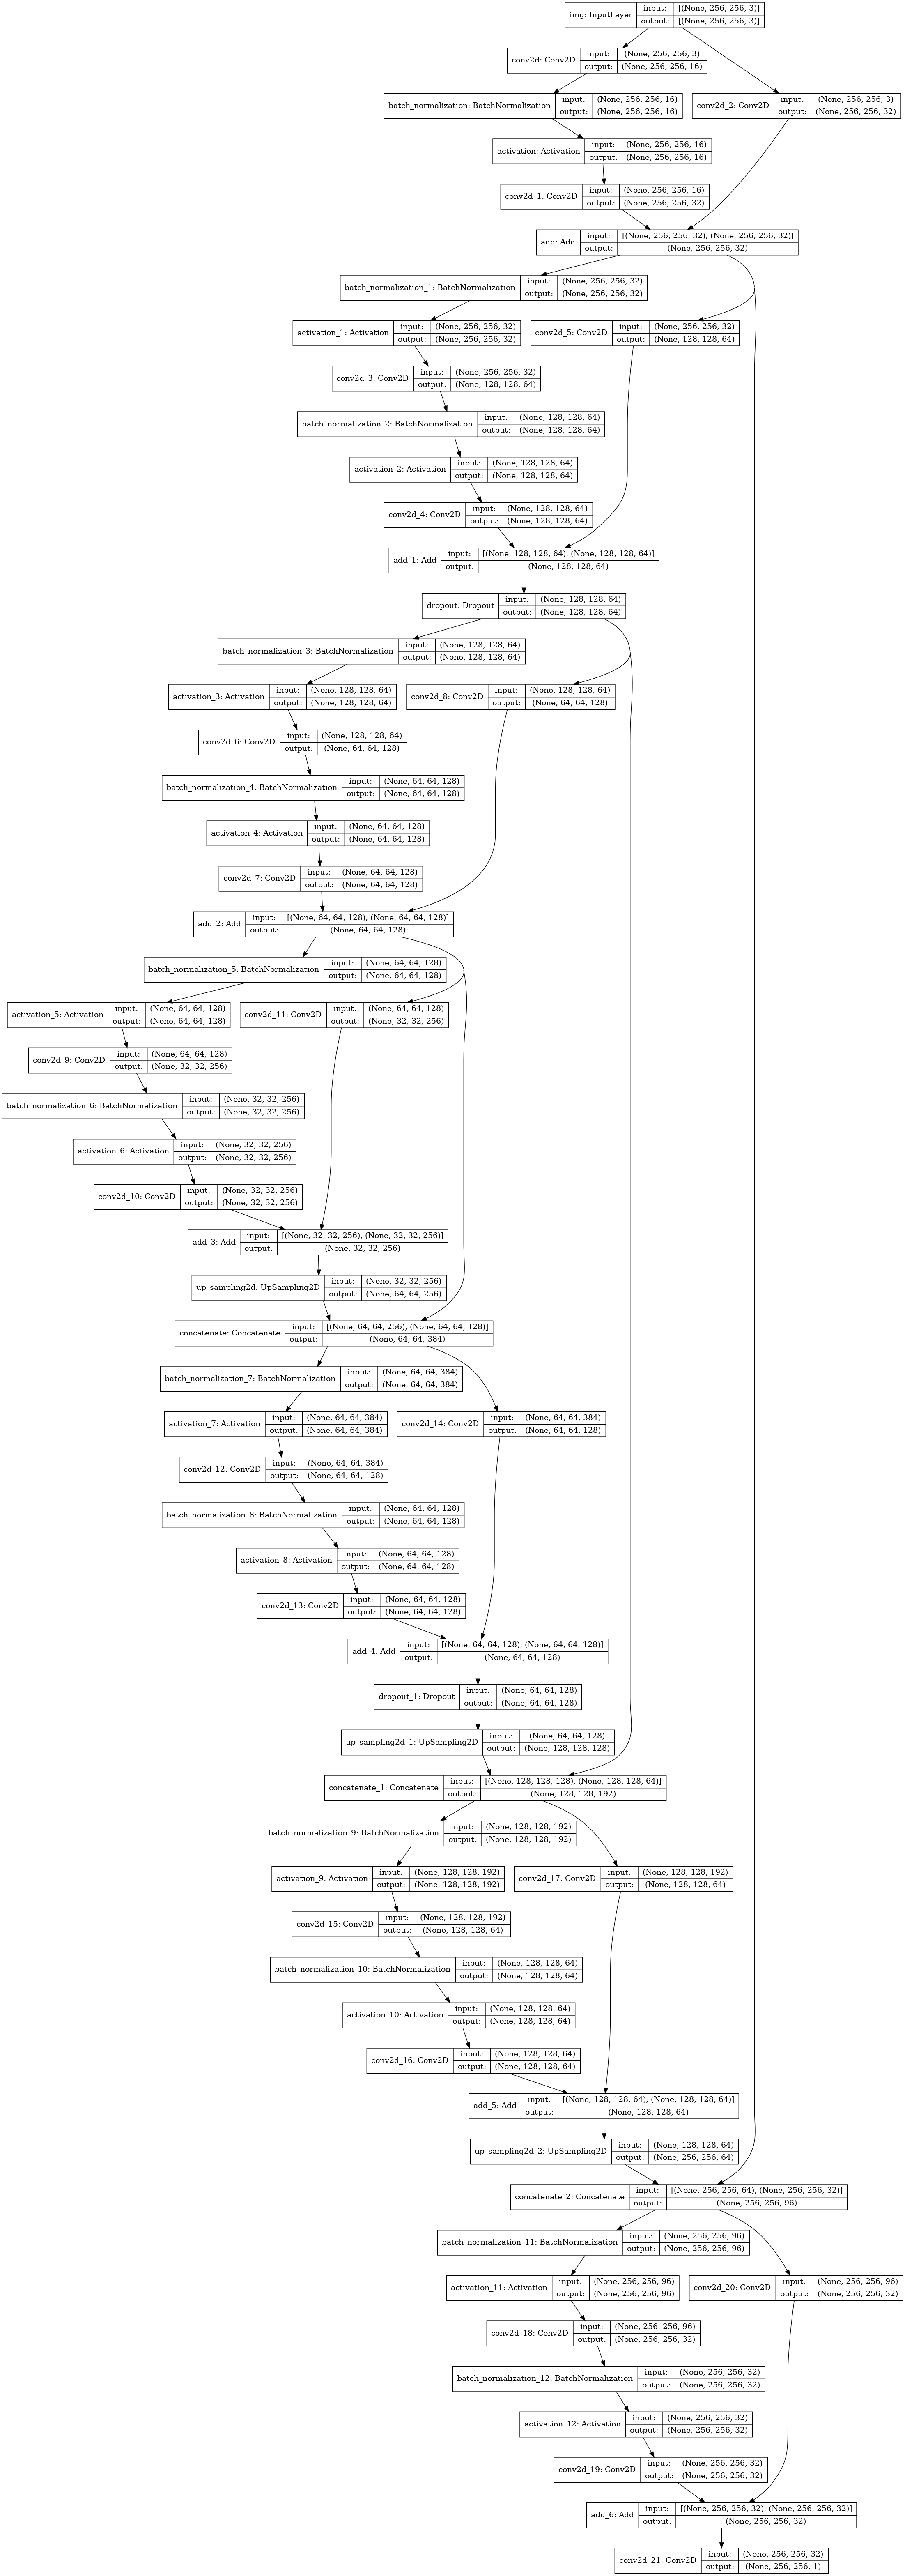

In [33]:
tf.keras.utils.plot_model(res_unet_model, to_file="resunet.png", show_shapes=True)

In [27]:
# compling model and callbacks functions

# adam = tf.keras.optimizers.Adam(0.0001)

BATCH_SIZE = 32
learning_rate = 1e-4

train_generator_args = dict(rotation_range=0.2,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest')

train_gen = train_generator(X_train,BATCH_SIZE,
                           train_generator_args,
                           target_size = (256,256))

validation_gen = train_generator(X_val,BATCH_SIZE,
                           dict(),
                           target_size = (256,256))

optimizer = tf.keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)

res_unet_model.compile(optimizer = "adam", loss = dice_coef_loss, metrics = ["binary_accuracy", jacard_coef, dice_coef])
# model.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])

earlystopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="ResUNet-segModel-weights.hdf5",verbose=1,save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.0001,factor=0.1)

In [28]:
tf.keras.backend.clear_session()
history = res_unet_model.fit(train_gen, steps_per_epoch=len(X_train) / BATCH_SIZE, epochs = 20, validation_data = validation_gen,
                    validation_steps=len(X_val) / BATCH_SIZE,
                    callbacks = [earlystopping,checkpointer,reduce_lr])

Found 3143 validated image filenames.
Found 3143 validated image filenames.
Epoch 1/20
99/98 [==============================] - ETA: 0s - loss: -0.3812 - binary_accuracy: 0.9471 - jacard_coef: 0.2526 - dice_coef: 0.3812Found 393 validated image filenames.
Found 393 validated image filenames.
98/98 [==============================] - 90s 865ms/step - loss: -0.3820 - binary_accuracy: 0.9474 - jacard_coef: 0.2531 - dice_coef: 0.3819 - val_loss: -0.0467 - val_binary_accuracy: 0.7738 - val_jacard_coef: 0.0253 - val_dice_coef: 0.0491

Epoch 00001: val_loss improved from inf to -0.04671, saving model to ResUNet-segModel-weights.hdf5
Epoch 2/20
98/98 [==============================] - 81s 829ms/step - loss: -0.5372 - binary_accuracy: 0.9912 - jacard_coef: 0.3764 - dice_coef: 0.5372 - val_loss: -0.2457 - val_binary_accuracy: 0.9903 - val_jacard_coef: 0.1469 - val_dice_coef: 0.2478

Epoch 00002: val_loss improved from -0.04671 to -0.24574, saving model to ResUNet-segModel-weights.hdf5
Epoch 3/20


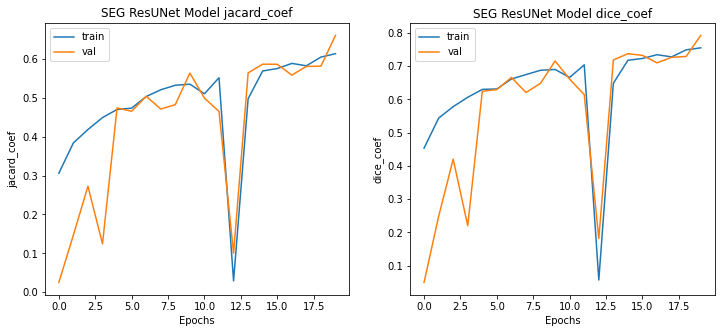

In [29]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['jacard_coef']);
plt.plot(history.history['val_jacard_coef']);
plt.title("SEG ResUNet Model jacard_coef");
plt.ylabel("jacard_coef");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);

plt.subplot(1,2,2)
plt.plot(history.history['dice_coef']);
plt.plot(history.history['val_dice_coef']);
plt.title("SEG ResUNet Model dice_coef");
plt.ylabel("dice_coef");
plt.xlabel("Epochs");
plt.legend(['train', 'val']);


In [30]:
test_gen = train_generator(X_test,BATCH_SIZE,
                           dict(),
                           target_size = (256,256))
results = res_unet_model.evaluate(test_gen,steps = len(X_test) / BATCH_SIZE)

Found 393 validated image filenames.
Found 393 validated image filenames.
12/12 [==============================] - 6s 483ms/step - loss: -0.7769 - binary_accuracy: 0.9968 - jacard_coef: 0.6550 - dice_coef: 0.7851


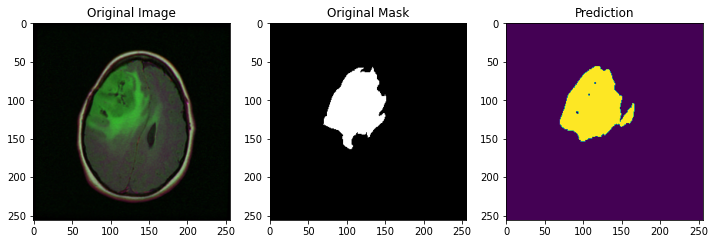

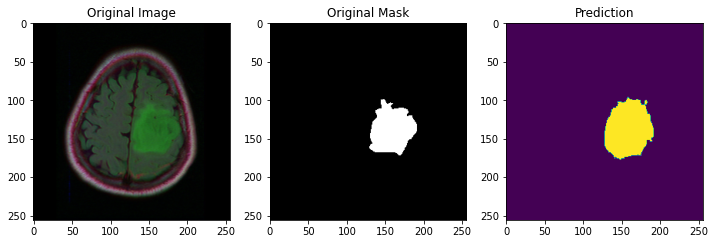

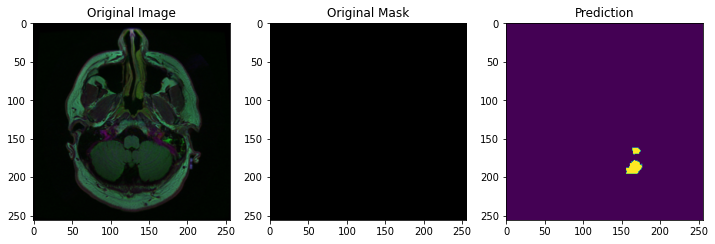

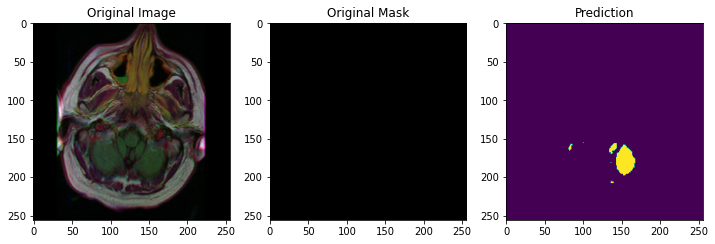

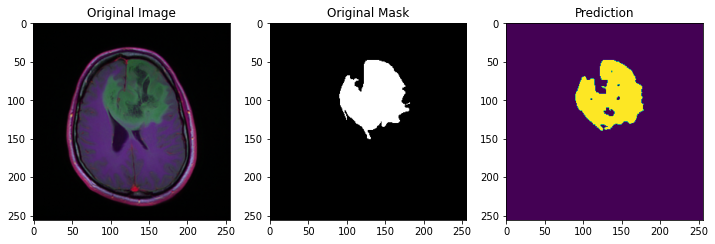

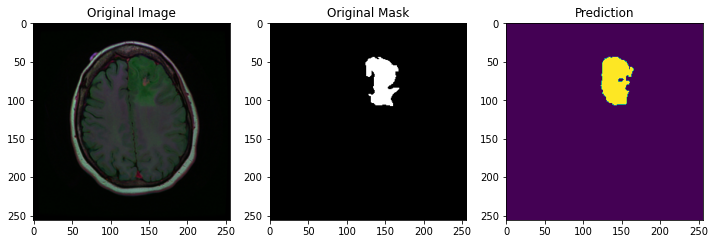

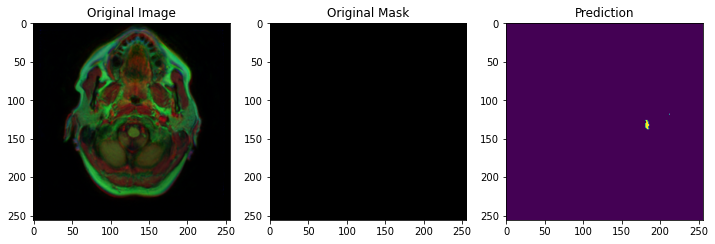

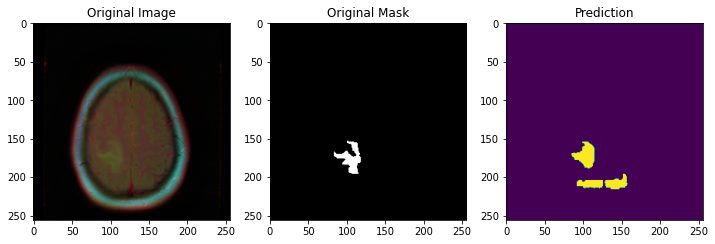

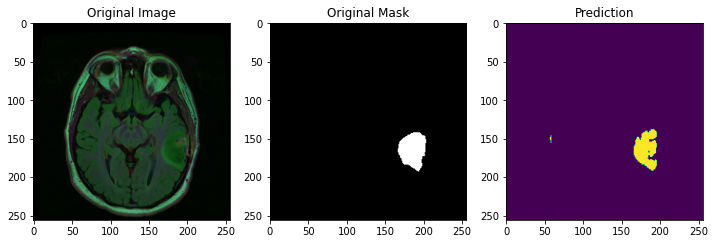

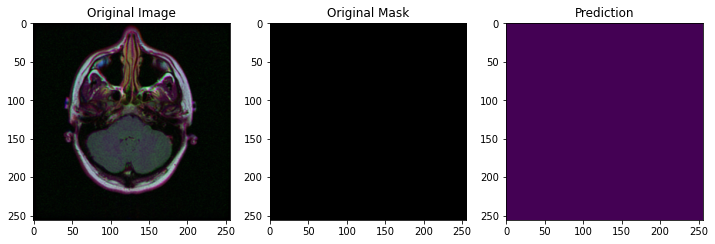

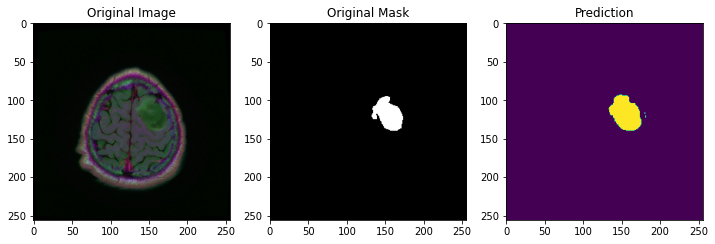

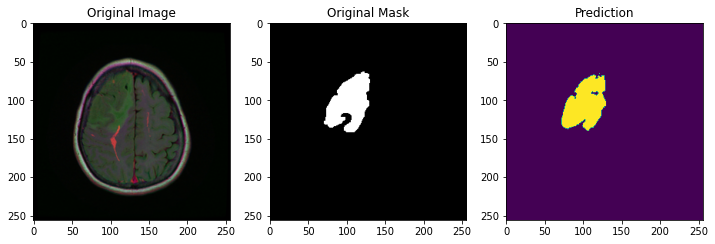

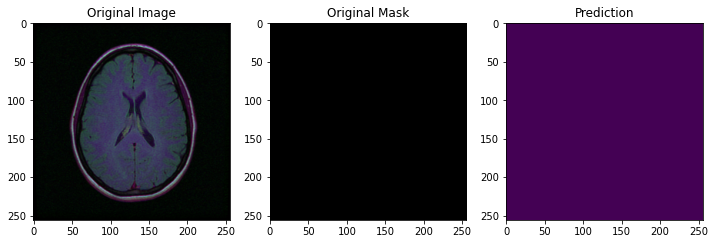

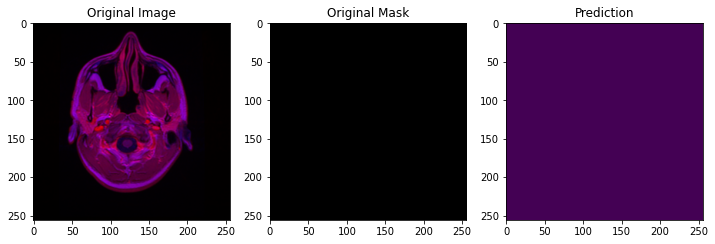

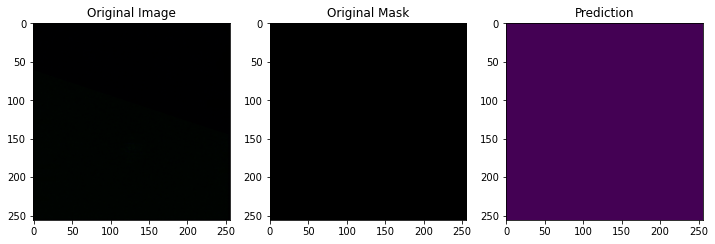

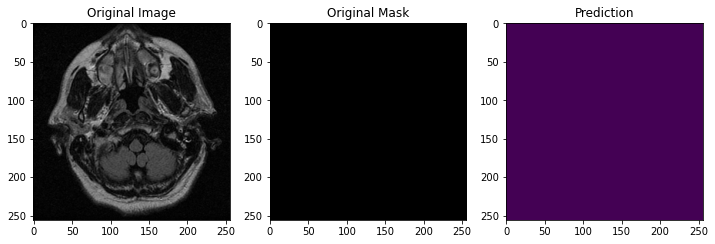

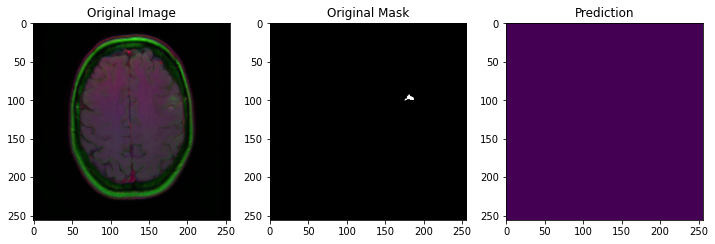

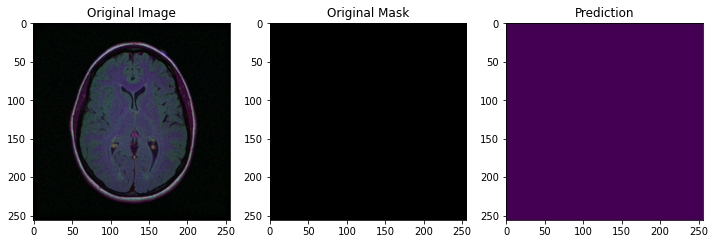

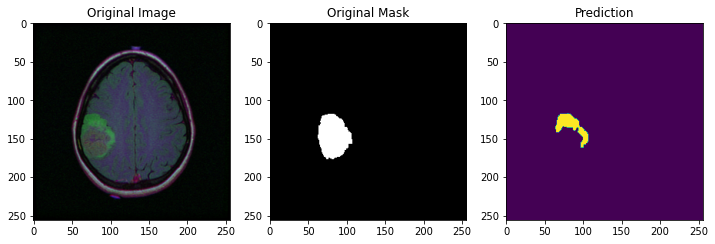

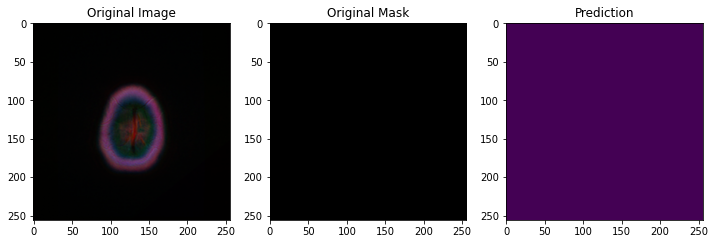

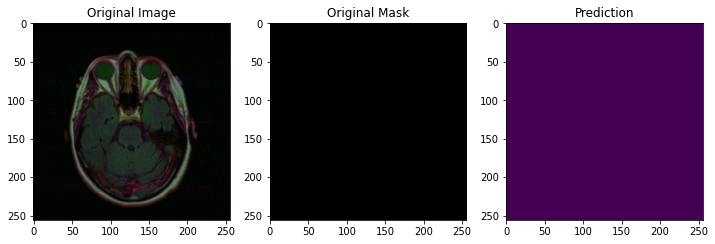

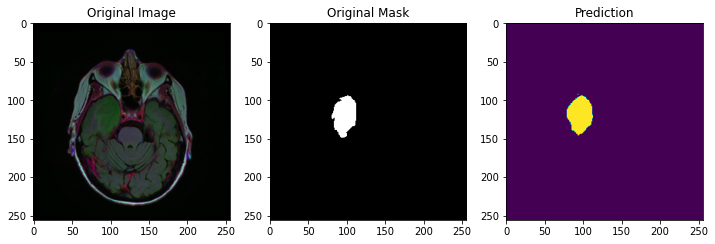

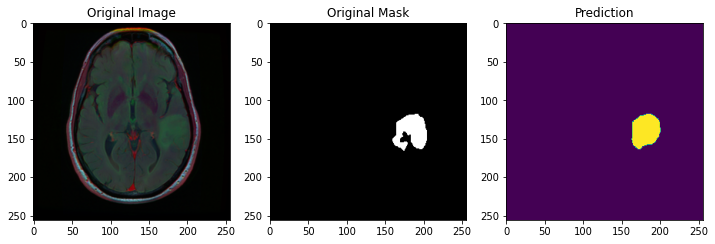

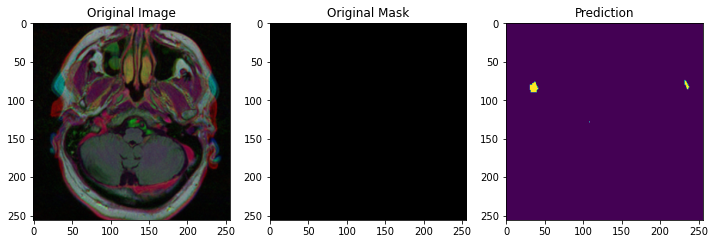

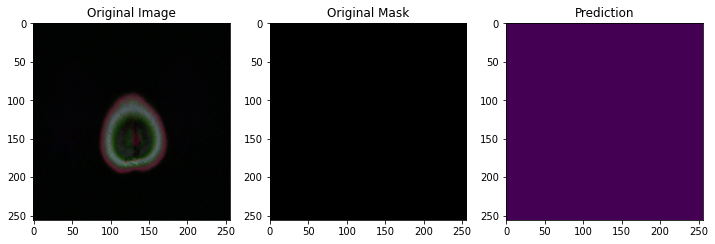

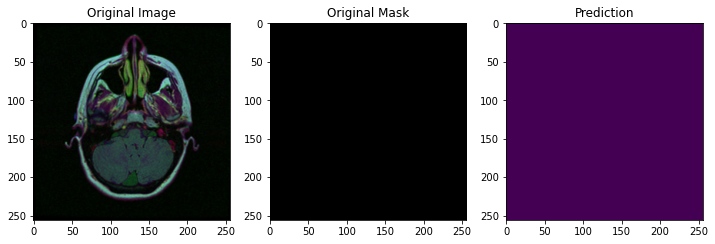

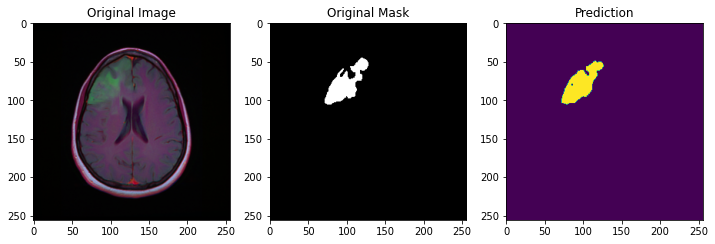

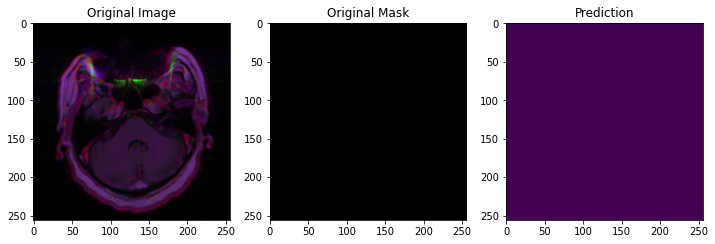

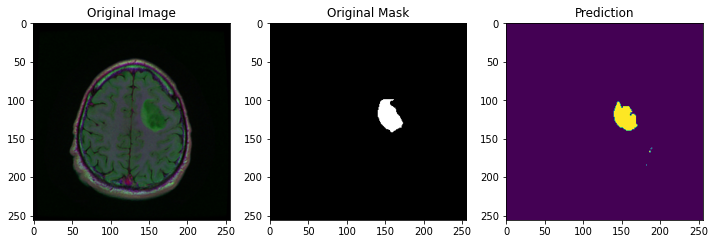

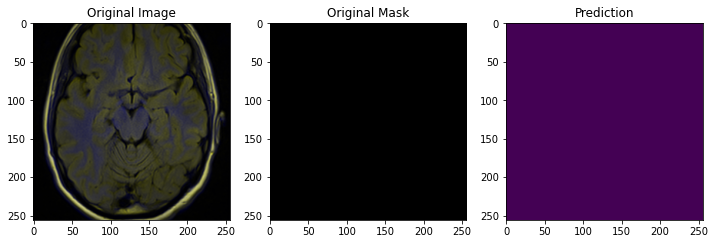

In [32]:
for i in range(30):
    index=np.random.randint(1,len(X_test.index))
    img = cv2.imread(X_test['image_path'].iloc[index])
    img = cv2.resize(img ,(256, 256))
    img = img / 255
    img = img[np.newaxis, :, :, :]
    pred=res_unet_model.predict(img)

    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.imshow(np.squeeze(img))
    plt.title('Original Image')
    plt.subplot(1,3,2)
    plt.imshow(np.squeeze(cv2.imread(X_test['mask_path'].iloc[index])))
    plt.title('Original Mask')
    plt.subplot(1,3,3)
    plt.imshow(np.squeeze(pred) > .5)
    plt.title('Prediction')
    plt.show()